<div class = "alert alert-info"> <h2 align = center> Productivité des entreprises </h2> </div>

<h3> <font color = red> <u> Description des données </u> </font> </h3>

Les données que nous avons contiennent les informations recueillies sur  2706 entreprises. Elles contiennent les variablles suivantes: 

- id: le numéro d'identification de l'entreprise.
- annee: l'année ou les mesures ont été effectuées dans l'entreprise. 
- agemoy: l'age moyen des travailleurs engagés dans l'entreprise. 
- etp: le nombre moyen de travailleurs en équivalent temps plein ETP dans l'entreprise sur base annuelle.
- prod: la mesure de productivité en milliers d'euro. 
- cap: le capital en milliers d'euro.
- nace: code [NACE](https://fr.wikipedia.org/wiki/Code_NACE) de l'entreprise suivant la nomenclature européenne.
- sect: le secteur d'activité de l'entreprise (M = Construction). 

<h3> <font color = red> <u> Analyse exploratoire des données </u> </font> </h3>

In [1]:
# Importation des données productivite.txt

data <- read.table("../data/productivite.txt", sep = "\t", header = TRUE)

In [2]:
# dimension des données

dim(data)

[1] 2706    8

In [3]:
# appercu des premieres lignes 

head(data)

id,annee,agemoy,etp,prod,cap,nace,sect
1,2006,38.47170,51,4923,1250,24460,M
2,2006,43.53333,29,930,1280,31010,M
3,2006,46.40909,21,129,62,13100,M
4,2006,41.48837,45,4301,372,31010,M
5,2006,37.04348,22,1431,159,25110,M
6,2006,39.75000,25,907,62,32500,M


In [4]:
# Resumé statistiques des variables du dataset

summary(data)

       id             annee          agemoy           etp      
 Min.   :   1.0   Min.   :2006   Min.   :24.90   Min.   :  17  
 1st Qu.: 677.2   1st Qu.:2006   1st Qu.:37.59   1st Qu.:  34  
 Median :1353.5   Median :2006   Median :40.12   Median :  54  
 Mean   :1353.5   Mean   :2006   Mean   :40.03   Mean   : 153  
 3rd Qu.:2029.8   3rd Qu.:2006   3rd Qu.:42.46   3rd Qu.: 119  
 Max.   :2706.0   Max.   :2006   Max.   :58.00   Max.   :8246  
      prod              cap               nace       sect    
 Min.   :      7   Min.   :      6   Min.   :10110   M:2706  
 1st Qu.:   2048   1st Qu.:    248   1st Qu.:15140           
 Median :   3802   Median :    893   Median :22290           
 Mean   :  17212   Mean   :  16635   Mean   :21185           
 3rd Qu.:   9160   3rd Qu.:   3300   3rd Qu.:25999           
 Max.   :1898274   Max.   :7323050   Max.   :35200           

Avec ces statistiques, nous pouvons voir que toutes les entreprise de notre dataset sont du même secteur d'activité M qui représente la construction. L'age moyen des travailleurs de ces entreprises est de 40 ans.

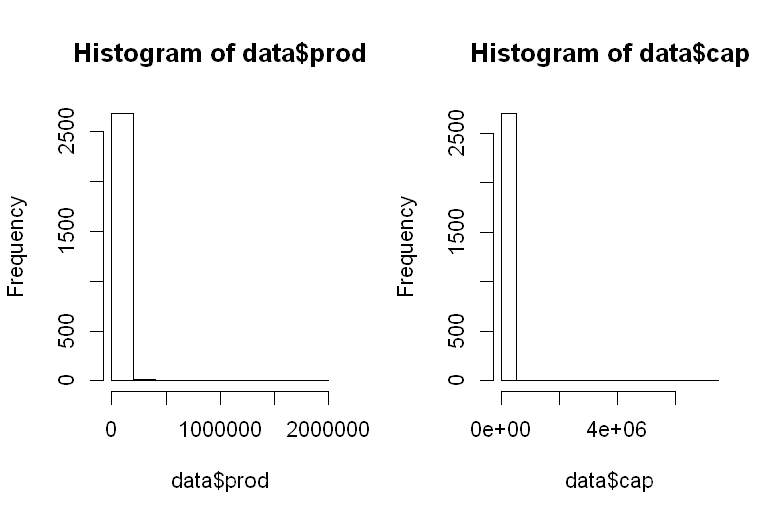

In [20]:
# distribution des variables productivité et capital

options(repr.plot.height = 4, repr.plot.width = 6, repr.plot.res = 130
par(mfrow = c(1, 2))
hist(data$prod)
hist(data$cap)

Nous pouvons remarquer que la productivité de la plupart des entreprise se trouvent dans la première classe; de même pour le capital. Donc que la plupart des entreprises ont une faible productivité et un faible capital. On note toutefois la présence d'un faible nombre d'entreprises ou ces deux variables sont élevées. 


Afin de mieux voir ces distributions, on va utiliser une échelle logarithmique. 

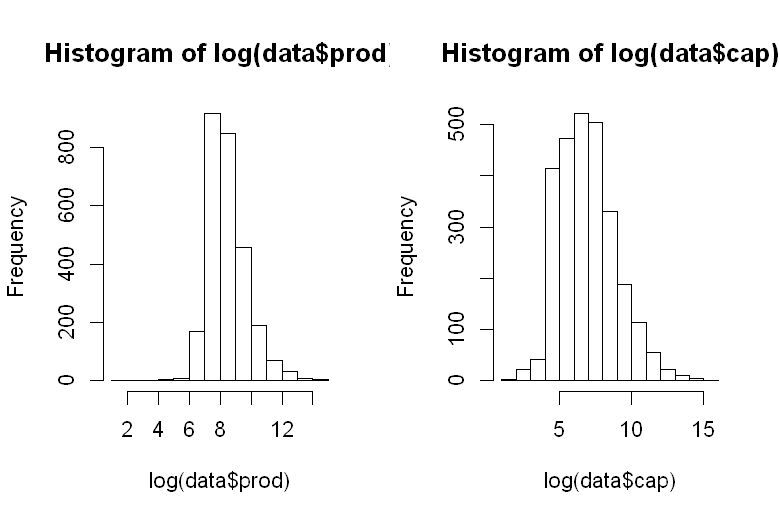

In [22]:
# distribution des variables productivité et capital

par(mfrow = c(1, 2))
hist(log(data$prod))
hist(log(data$cap))

A présent nous nous intéressons au lien entre le capital physique d’une entreprise (variable cap) et sa productivité (variable prod).

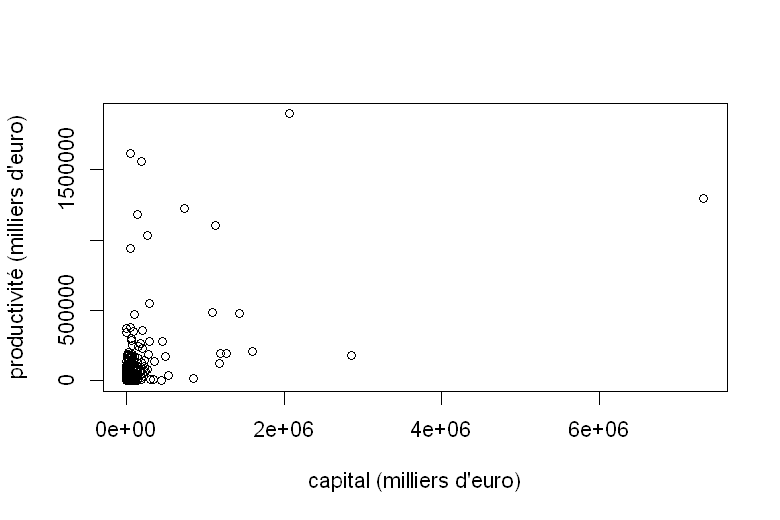

In [24]:
# Relation entre la productivité et le capital 

plot(data$prod ~ data$cap, xlab = "capital (milliers d'euro)", ylab = "productivité (milliers d'euro)")

On peut voir que les points sont concentrés au voisinnage de zéro; ce qui est en accord avec le fait que la plupart des entreprises ont une productivité et un capital faible. Cependant on peut voir quelques entreprises qui se démarquent vraiment des autres et ont une productivité et un capital très élevés. 


Ce graphique ne nous permet pas de voir une relation entre ces deux variables. On va passer en échelle logarithmique pour observer le comportement général des entreprises.  

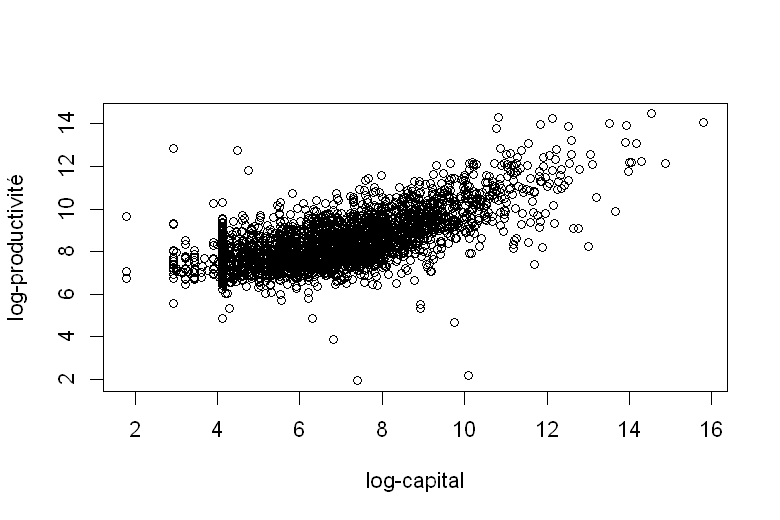

In [25]:
# Relation entre productivité et capital 

plot(log(data$prod) ~ log(data$cap), xlab = "log-capital", ylab = "log-productivité")

On peut observer une correlation linéaire positive entre les variables log-capital et log-productivité. Ainsi, les entreprise qui ont plus de capital ont tendance à avoir une productivité plus élevée que les autres entreprises. 

A présent, nous allons examiner la distribution statistique de la log-productivité d’entreprises en fonction de leur log-capital. En prenant la valeur entière du log-capital, nous avons créé une variable discrète qui représente des catégories de log-capital. Par exemple toute entreprise dont le log-capital est supérieur à 2 et inférieur à 3 se trouve dans une catégorie pour laquelle la variable discrète est 2.


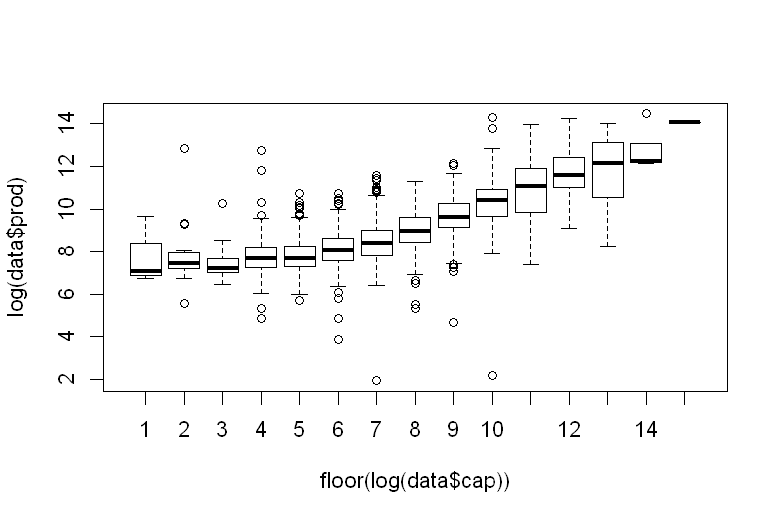

In [38]:
# Box plot de la log-productivité en fonction des catégories de log-capital

boxplot(log(data$prod) ~ floor(log(data$cap)))

Le graphe précédent permet de voir que la moyenne de la log-productivité augmente si l’on considère des entreprises dont le log-capital est croissant.

<h3> <font color = red> <u> Modélisation: méthode des moindres carrés ordinaires </u> </font> </h3>

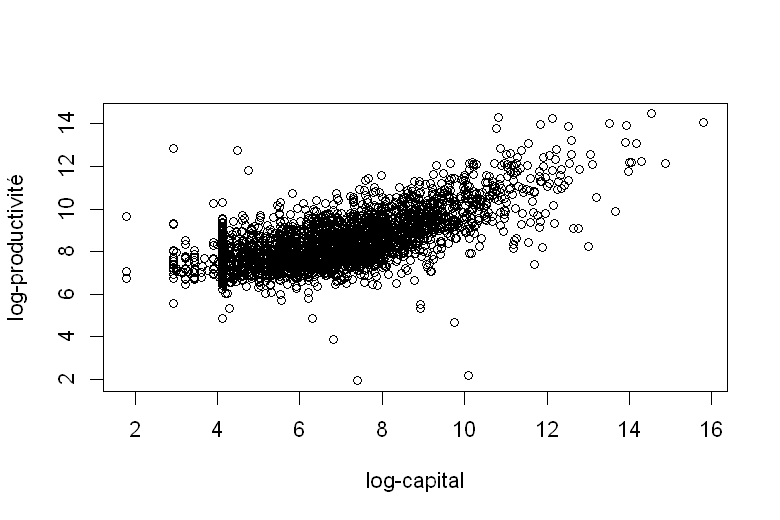

In [42]:
# Nuage de points

plot(log(data$prod)~log(data$cap), xlab = "log-capital", ylab = "log-productivité")

In [40]:
# Estimations des paramètres du modèle

modele1 <- lm(log(data$prod)~log(data$cap))
summary(modele1)


Call:
lm(formula = log(data$prod) ~ log(data$cap))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6124 -0.5839 -0.0614  0.5364  6.0083 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.579720   0.064293   86.79   <2e-16 ***
log(data$cap) 0.418839   0.008926   46.92   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9299 on 2704 degrees of freedom
Multiple R-squared:  0.4488,	Adjusted R-squared:  0.4486 
F-statistic:  2202 on 1 and 2704 DF,  p-value: < 2.2e-16


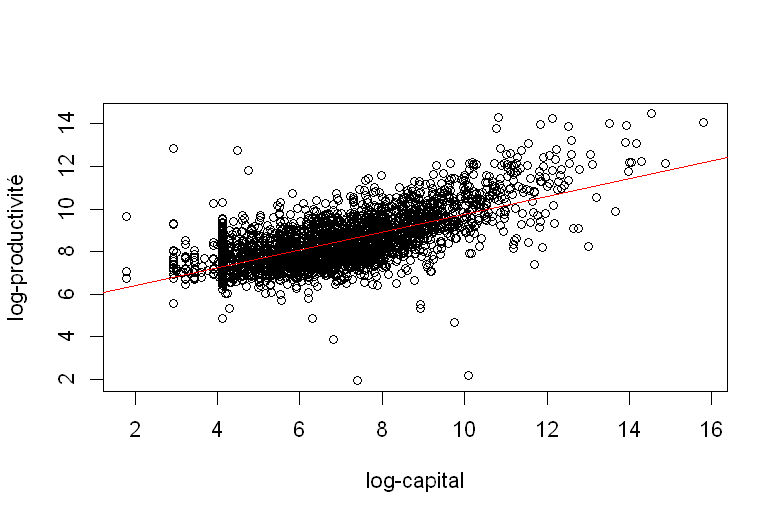

In [43]:
# Droite de regression sur le nuage de points

plot(log(data$prod)~log(data$cap), xlab = "log-capital", ylab = "log-productivité")
abline(modele1, col = "red")

A présent, analysons les résidus de notre modèle. 

In [46]:
# Résumé statistique

summary(modele1$residuals)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-7.61241 -0.58386 -0.06143  0.00000  0.53636  6.00833 

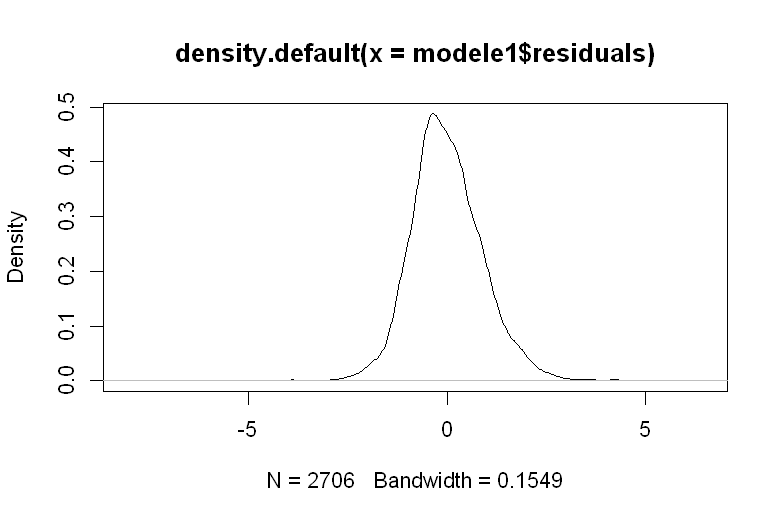

In [47]:
# Densité des résidus

plot(density(modele1$residuals))

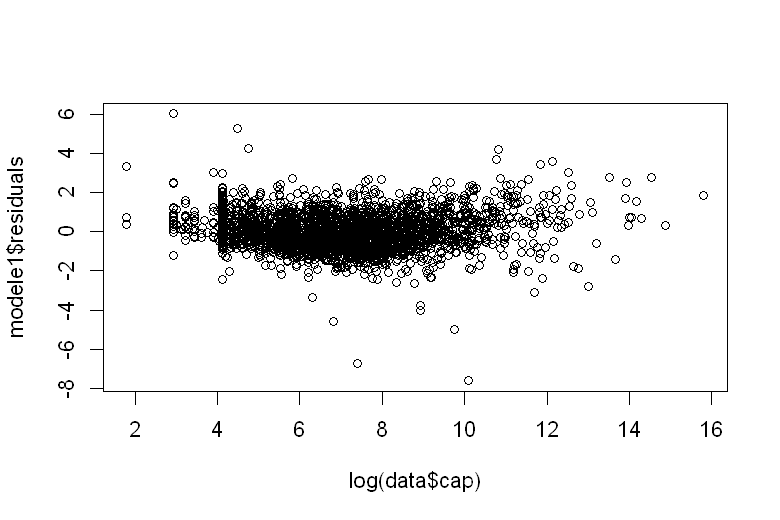

In [48]:
# Verifions l'indépendance entre le log-capital et les résidus

plot(modele1$residuals ~ log(data$cap))

On voit bien qu'il n'y a pas de relation linéaire entre les résidus et la variable log-capital; ce qui correspond bien à notre hypothèse d'indépendance. 

In [49]:
# La somme des résidus doit être égale à zero

sum(modele1$residuals)

[1] -2.159384e-14